In [2]:
# importing modules and inititalising variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('D:/UIUC_courses/IE517/IE517_FY21_HW3/HY_Universe_corporate_bond.csv')
print(df.head())

df=df.values


df[:,14]=df[:,14].astype(str)
df[:,12]=df[:,12].astype(str)
df[:,5:9]=df[:,5:9].astype(str)
df[:,15]=df[:,15].astype(np.float)
score=np.zeros(len(df[:,1]))
avg_score=np.zeros(len(df[:,1]))
count=np.zeros(len(df[:,1]))

       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359    

In [4]:
# Computing the average score based on different ratings
for i in range(len(df[:,1])):
    
    for j in range(4):
        
        if df[i,j+5][0]=='A':
            df[i,j+5]=2
            count[i]=count[i]+1
            score[i]=score[i]+2;
            
        elif df[i,j+5][0]=='B':
            df[i,j+5]=1
            count[i]=count[i]+1
            score[i]=score[i]+1;
            
            
        elif df[i,j+5][0]=='C':
            df[i,j+5]=0
            count[i]=count[i]+1
            score[i]=score[i]+0;
            
        else:
            df[i,j+5]='NaN'
            
        
        avg_score[i]=(score[i])/count[i]
        
        

<ipython-input-4-200937f0bc95>:26: RuntimeWarning: invalid value encountered in double_scalars
  avg_score[i]=(score[i])/count[i]


TypeError: 'int' object is not subscriptable

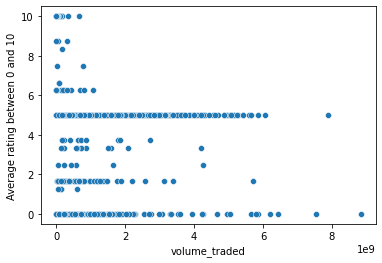

In [26]:
volume_traded_score_raw=np.transpose(np.array([avg_score,df[:,22]]))
volume_traded_score=[]
#volume_traded_score1=volume_traded_score[:, ~np.isnan(volume_traded_score[:,0].astype(np.float))]
for i in range(len(df[:,1])):
    if ~np.isnan(avg_score[i]):
        volume_traded_score.append([round(avg_score[i],2)*5,df[i,22]])
volume_traded_score_np=np.array(volume_traded_score)
volume_traded_score_df=pd.DataFrame(np.array(volume_traded_score),columns=['score','volume_traded'])
a=sns.scatterplot(data=volume_traded_score_df,x="volume_traded",y="score")

plt.xlabel("volume_traded")
plt.ylabel("Average rating between 0 and 10")
plt.show()

# below plot shows that most of the bonds are traded in high volumes tend to have lower ratings

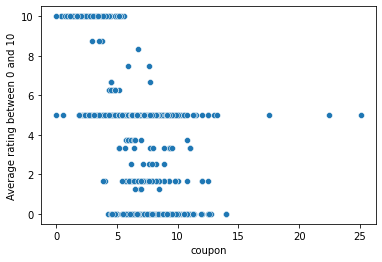

In [18]:
coupon_score_raw=np.transpose(np.array([avg_score,df[:,9]]))
coupon_score=[]
#coupon_score1=coupon_score[:, ~np.isnan(coupon_score[:,0].astype(np.float))]
for i in range(len(df[:,1])):
    if ~np.isnan(avg_score[i]):
        coupon_score.append([round(avg_score[i],2)*5,df[i,9]])
coupon_score_np=np.array(coupon_score)
coupon_score_df=pd.DataFrame(np.array(coupon_score),columns=['score','coupon'])
sns.scatterplot(data=coupon_score_df,x="coupon",y="score")
plt.xlabel("coupon")
plt.ylabel("Average rating between 0 and 10")
plt.show()

# below plot shows that bonds with high coupon rate tend to have slightly lower ratings

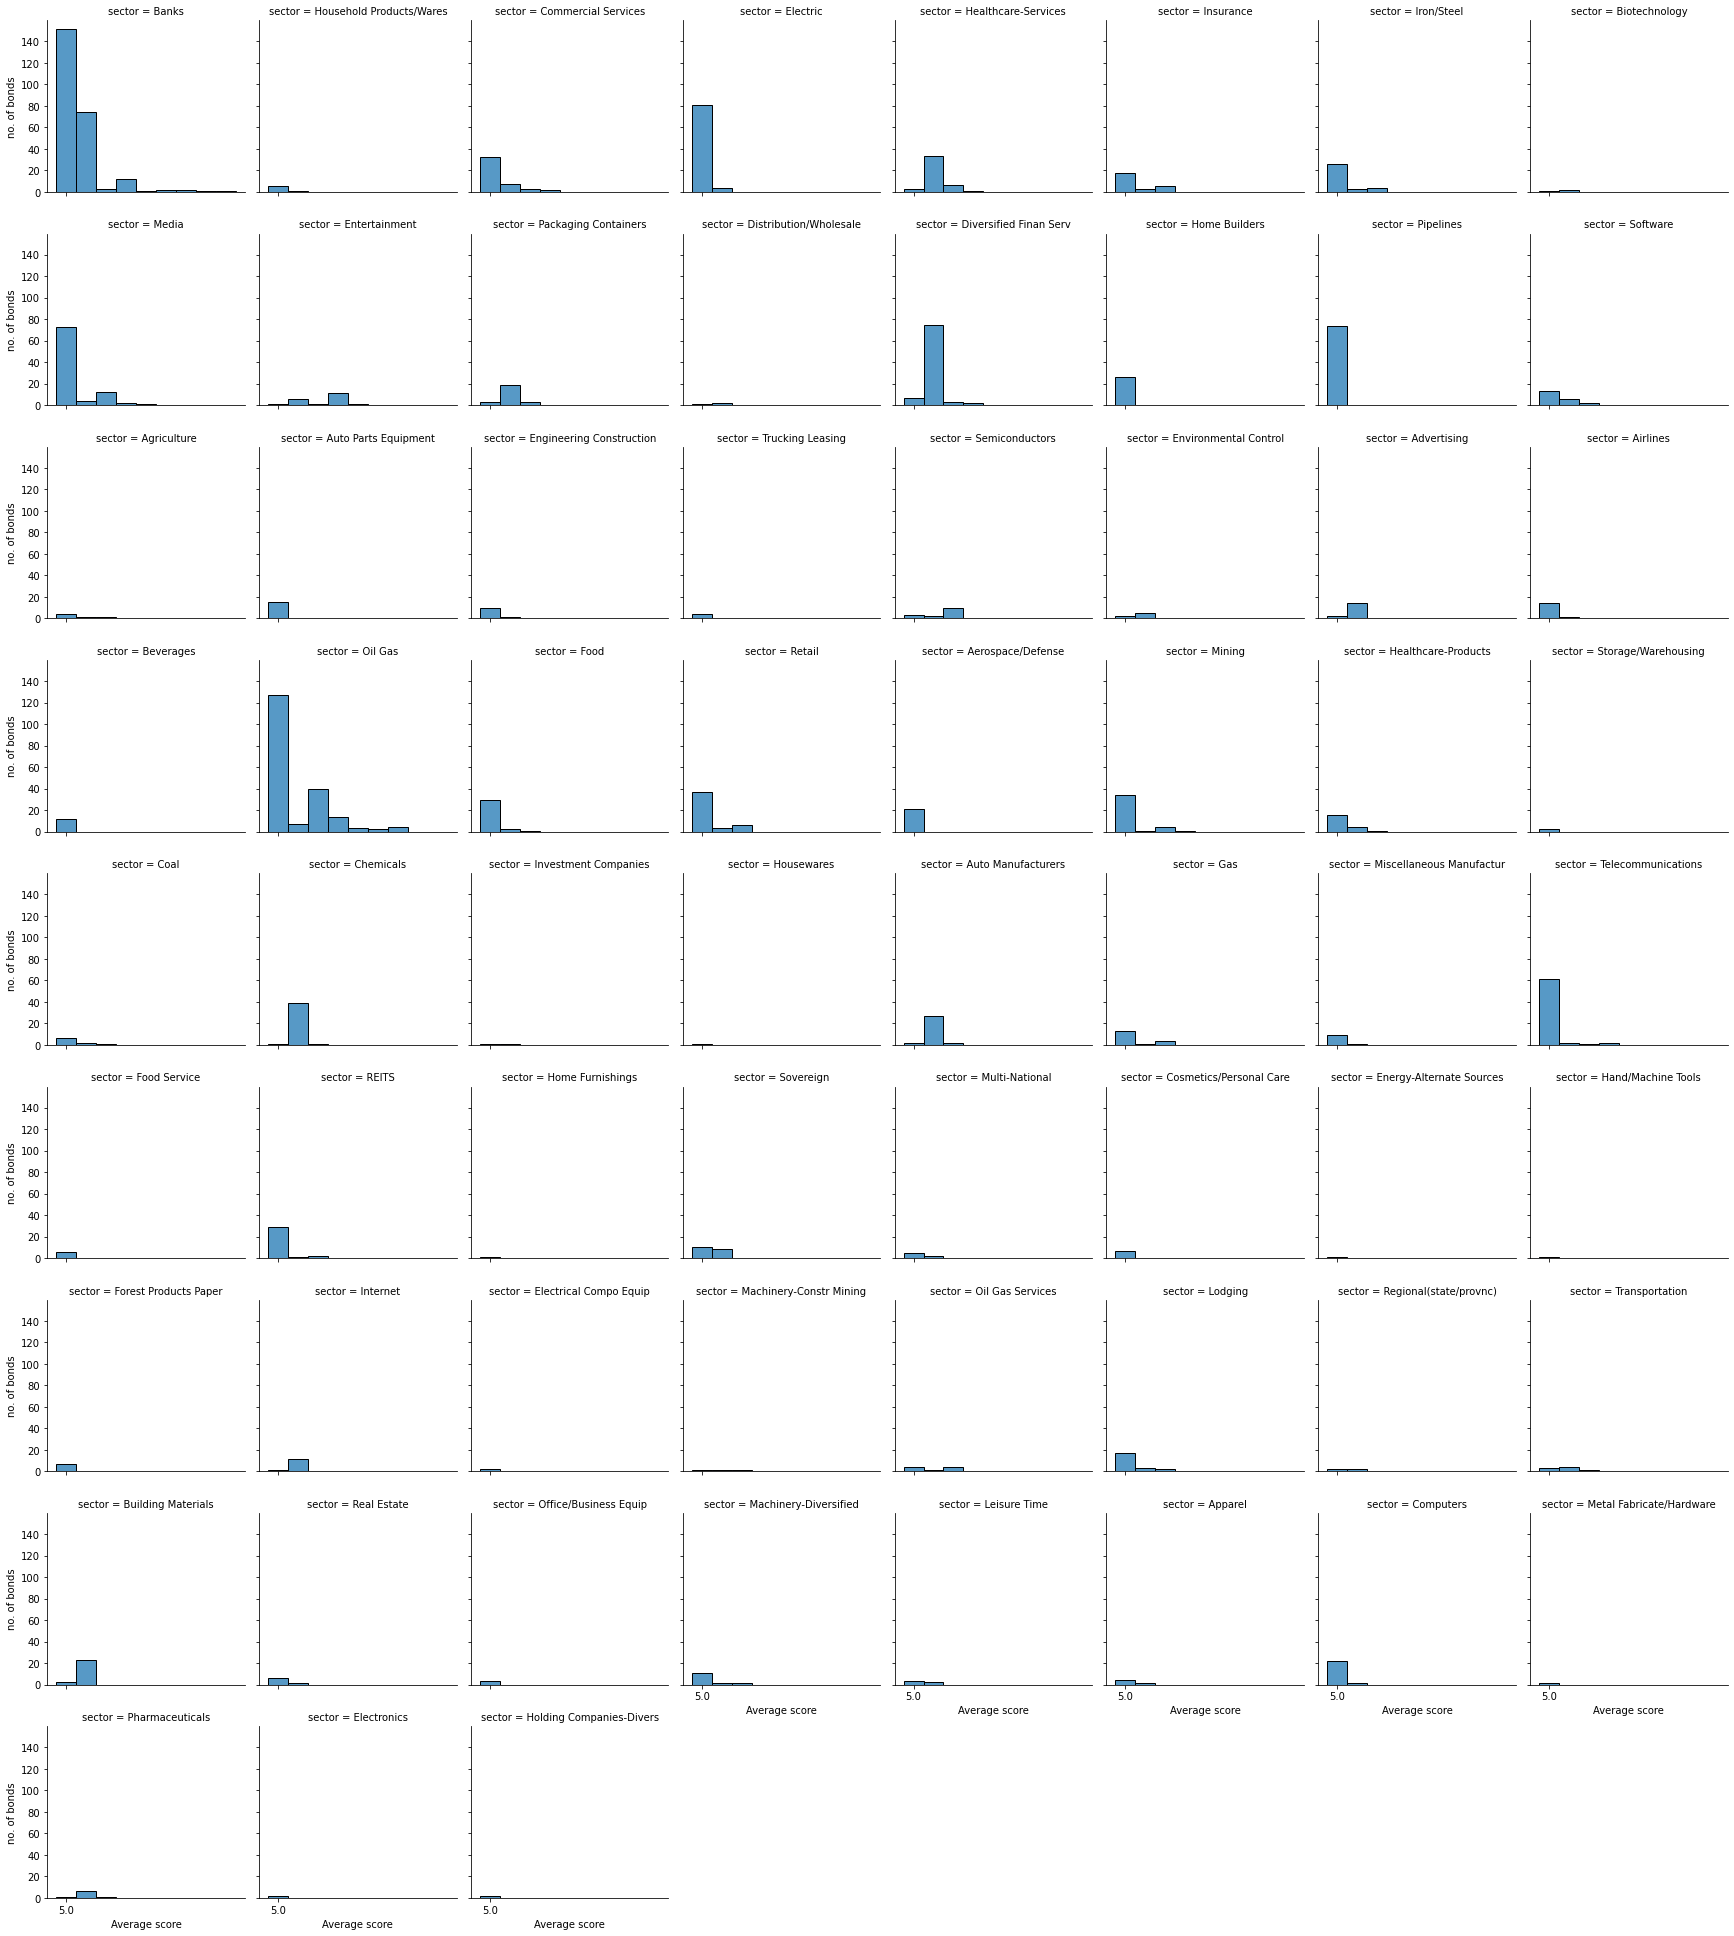

In [28]:
sector_score_raw=np.transpose(np.array([avg_score,df[:,14]]))
sector_score=[]
#sector_score1=sector_score[:, ~np.isnan(sector_score[:,0].astype(np.float))]
for i in range(len(df[:,1])):
    if ~np.isnan(avg_score[i]):
        sector_score.append([round(avg_score[i]*5,2),df[i,14]])
sector_score_np=np.array(sector_score)
sector_score_df=pd.DataFrame(np.array(sector_score),columns=['score','sector'])
g = sns.FacetGrid(sector_score_df, col="sector",col_wrap=8)
g.map(sns.histplot, "score")
g.set_axis_labels("Average score", "no. of bonds")
plt.show()

# sector wise average rating histograms plotted sector wise. We can see that Banks and oil and gas tend to g=have large number of bonds but are mostly low rated

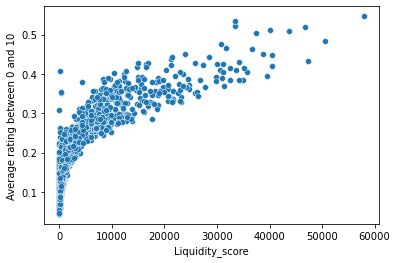

In [33]:
Liquidity_score_score_raw=np.transpose(np.array([df[:,20],df[:,21]]))
Liquidity_score_score=[]
#Liquidity_score_score1=Liquidity_score_score[:, ~np.isnan(Liquidity_score_score[:,0].astype(np.float))]
for i in range(len(df[:,1])):
    if ~np.isnan(df[i,20]):
        Liquidity_score_score.append([df[i,20],df[i,21]])
Liquidity_score_score_np=np.array(Liquidity_score_score)
Liquidity_score_score_df=pd.DataFrame(np.array(Liquidity_score_score),columns=['score','Liquidity_score'])
sns.scatterplot(data=Liquidity_score_score_df,x="Liquidity_score",y="score")
plt.xlabel("Liquidity_score")
plt.ylabel("Number of trades")
plt.show()

# Below plot shows that higher liquidity scored bonds are traded more which is expected